In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
sns.set(style='dark')
pd.set_option('display.max_columns', 100)
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV,cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor,Pool
from lightgbm import LGBMRegressor

In [6]:
high_diamond = pd.read_csv("high_diamond_ranked_10min.csv")


In [7]:
high_diamond.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [8]:
n = pd.DataFrame(high_diamond.isna().sum())
m = n.loc[n[0]!=0]
m['% Missing'] = m[0]*100.00/1460.00
m

,0,% Missing


There is no missing data!

In [20]:
y = high_diamond.blueWins.values
X = high_diamond.drop(['blueWins', 'gameId'], axis=1)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

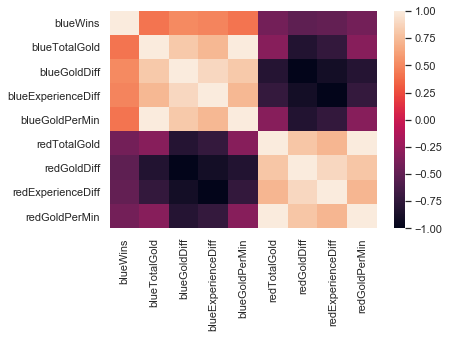

In [22]:
corr_mat = high_diamond.corr()
price_corr = corr_mat['blueWins']
top_corr_features = price_corr[price_corr.abs() > 0.4].index

sns.heatmap(corr_mat.loc[top_corr_features, top_corr_features])

In [24]:
model = LogisticRegression(solver='liblinear', random_state=0)


In [25]:
X_train.shape

(6915, 38)

In [26]:
y_train.shape

(6915,)

In [27]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
model.classes_

array([0, 1], dtype=int64)

In [29]:
model.coef_

array([[-1.84216490e-03,  1.37239378e-03,  4.00736888e-02,
         7.08146072e-03,  1.00591075e-03, -1.51985539e-02,
         1.50965269e-01,  1.53849240e-01, -2.88397045e-03,
        -1.09353753e-02,  9.87754225e-05, -1.37464244e-02,
         7.66499385e-06, -3.30496517e-04,  5.28119624e-03,
         1.60505042e-04,  1.00252702e-04, -3.30496517e-05,
         9.87754348e-06, -2.15475841e-03, -8.39483213e-03,
        -4.16154936e-02,  1.00591075e-03,  7.08146072e-03,
        -1.04597658e-03, -1.28687838e-01, -1.43307018e-01,
         1.46191792e-02,  2.55553883e-02, -6.17295718e-05,
        -8.04929879e-03, -9.25875936e-05,  4.05249343e-03,
         1.74791170e-03, -1.60505042e-04, -1.00252702e-04,
         4.05249343e-04, -6.17295509e-06]])

In [30]:
model.predict_proba(X_test)

array([[0.60064484, 0.39935516],
       [0.74921386, 0.25078614],
       [0.68556121, 0.31443879],
       ...,
       [0.69971945, 0.30028055],
       [0.90792858, 0.09207142],
       [0.42496435, 0.57503565]])

In [31]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [33]:
model.score(X_test,y_test)

0.7307692307692307

In [34]:
 confusion_matrix(y_test, model.predict(X_test))

array([[1104,  402],
       [ 396, 1062]], dtype=int64)

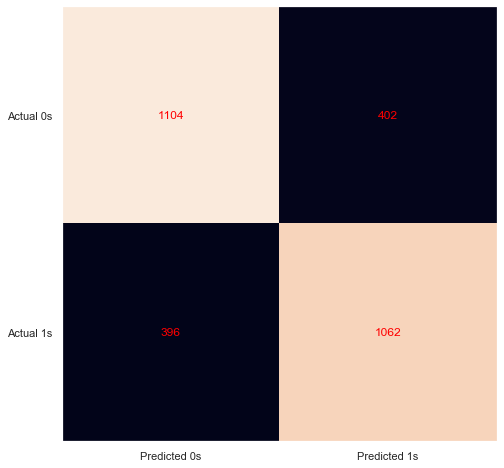

In [35]:
cm = confusion_matrix(y_test, model.predict(X_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [36]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.74      0.73      0.73      1506
           1       0.73      0.73      0.73      1458

    accuracy                           0.73      2964
   macro avg       0.73      0.73      0.73      2964
weighted avg       0.73      0.73      0.73      2964

